In [7]:
#install.packages("rcompanion")
#install.packages("qtl2")
#install.packages("LinkageMapView")

In [6]:
library("qtl2")
library("rcompanion")
library("LinkageMapView")

In [9]:
female <- read_cross2("female_control-carbaryl-summer.yaml")
map <- insert_pseudomarkers(female$gmap, step=1)
pr <- calc_genoprob(female, map, error_prob=0.002,cores=0)
summary(female)

Object of class cross2 (crosstype "bc")

Total individuals             294
No. genotyped individuals     294
No. phenotyped individuals    294
No. with both geno & pheno    294

No. phenotypes                  1
No. covariates                  0
No. phenotype covariates        0

No. chromosomes                19
Total markers                1100

No. markers by chr:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 50  23  57  67  61  38 110  66  75  71  48  49  49  25  56  55  44  78  78

In [ ]:
#lmv.linkage.plot("male_linkage.csv","male_linkage.pdf",pdf.width=82, pdf.height=19)

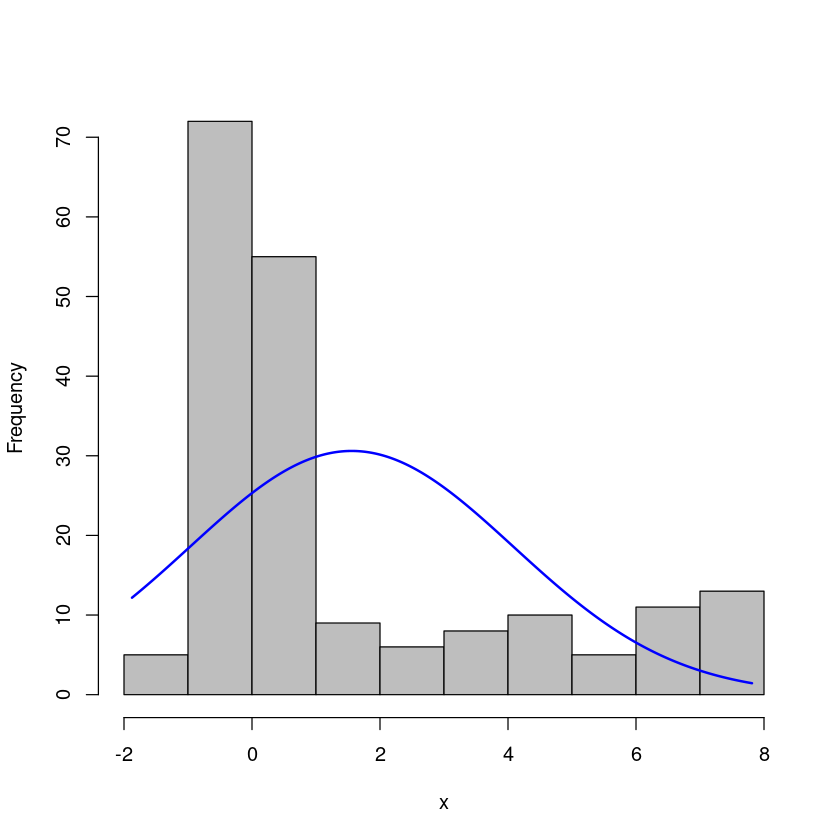

In [10]:
plotNormalHistogram(female$pheno[,1])

,diff
0.05,3.289932


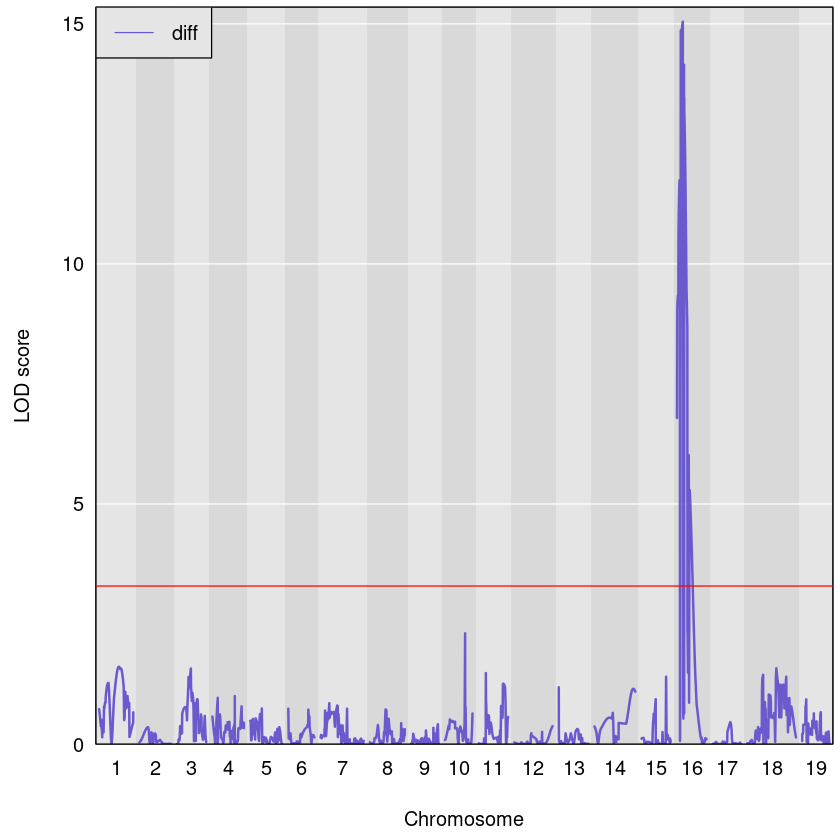

In [12]:
operm <- scan1perm(pr, female$pheno, n_perm=1000, cores=0)
out <- scan1(pr, female$pheno, cores=0)
write.csv(out,"LOD_female.csv")
ymx <- maxlod(out)
summary(operm)
lod <- summary(operm)
par(mar = c(4,4,0.3,0.3))
plot(out, map, lodcolumn=1, col="slateblue", ylim=c(0,ymx*1.02))
abline(h= lod, col = "red")
legend("topleft", lwd=1, col="slateblue", colnames(out),bg="gray90")

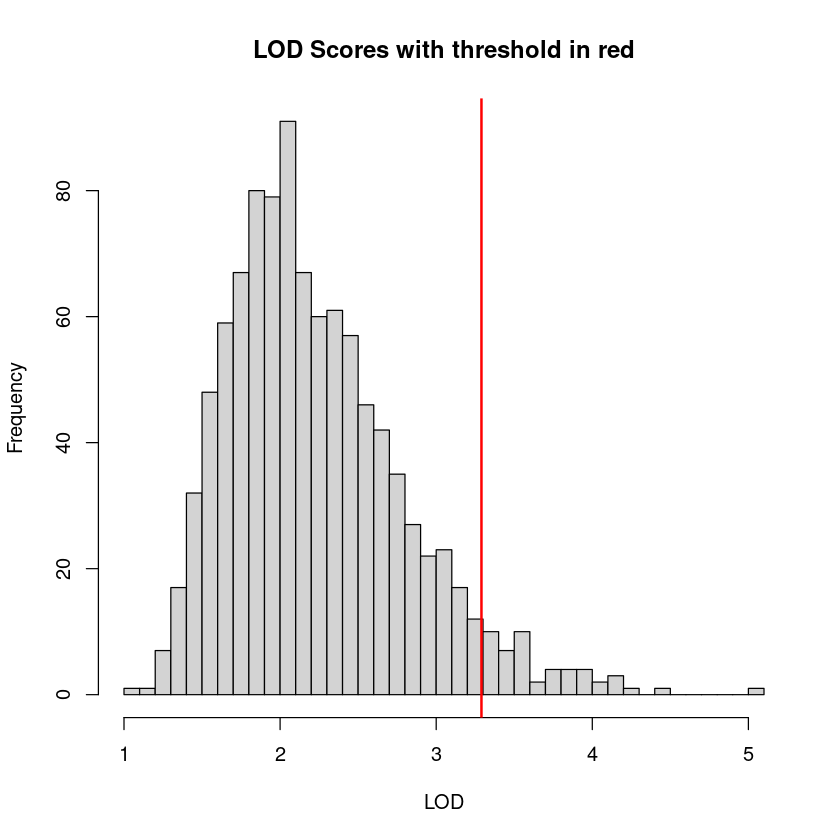

In [14]:
hist(operm[,'diff'],breaks = 50,xlab= "LOD",main= "LOD Scores with threshold in red")
abline(v=lod,col='red',lwd=2)

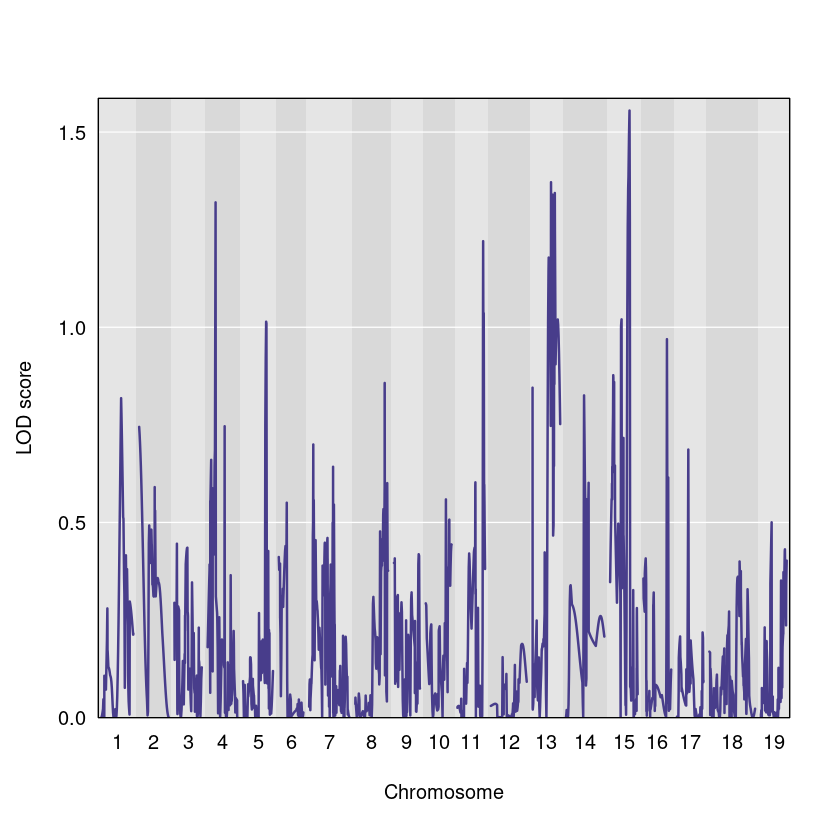

In [16]:
shuffled_order <- sample(rownames(female$pheno))
pheno_permuted <- female$pheno
rownames(pheno_permuted) <- shuffled_order
out_permuted <- scan1(pr,pheno_permuted,cores=0)
plot(out_permuted,map)

In [33]:
find_peaks(out,map,threshold=lod,drop=1.5,expand2markers=TRUE)
find_peaks(out,map,threshold=lod,prob=.95,expand2markers=TRUE)

lodindex,lodcolumn,chr,pos,lod,ci_lo,ci_hi
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>


lodindex,lodcolumn,chr,pos,lod,ci_lo,ci_hi
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>


In [19]:
male <- read_cross2("male_control-carbaryl-summer.yaml")
map <- insert_pseudomarkers(male$gmap, step=1)
pr <- calc_genoprob(male, map, error_prob=0.002,cores=0)
summary(male)

Object of class cross2 (crosstype "bc")

Total individuals             294
No. genotyped individuals     294
No. phenotyped individuals    294
No. with both geno & pheno    294

No. phenotypes                  1
No. covariates                  0
No. phenotype covariates        0

No. chromosomes                19
Total markers                1128

No. markers by chr:
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 
63 43 56 63 56 52 90 49 45 34 39 88 74 86 52 53 54 75 56

In [ ]:
#lmv.linkage.plot("female_linkage.csv","female_linkage.pdf",pdf.width=82, pdf.height=19)

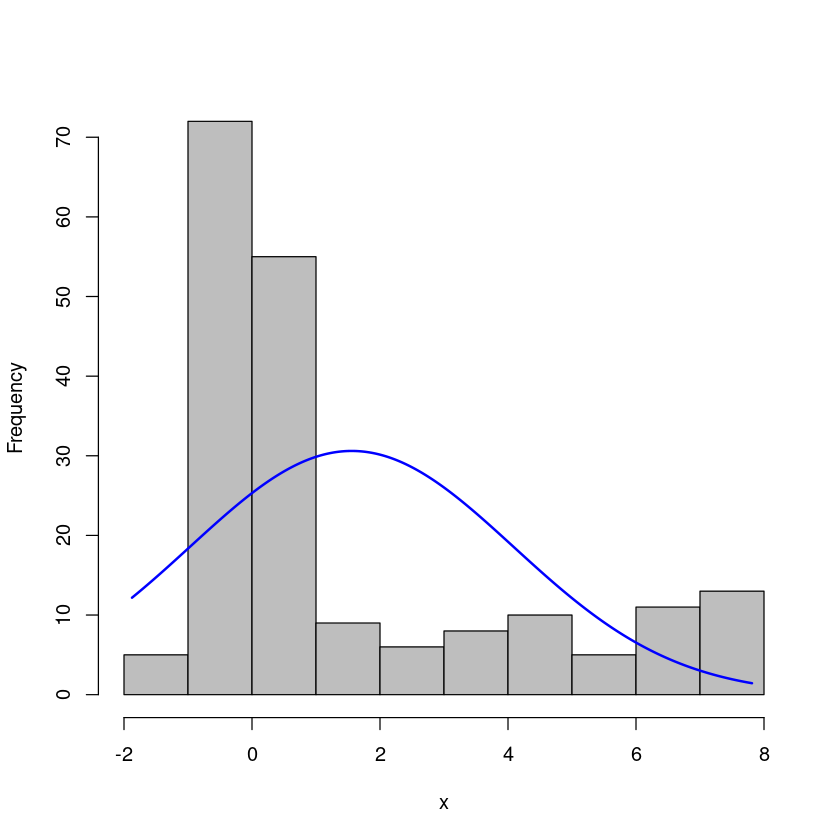

In [20]:
plotNormalHistogram(male$pheno[,1])

,diff
0.05,3.276789


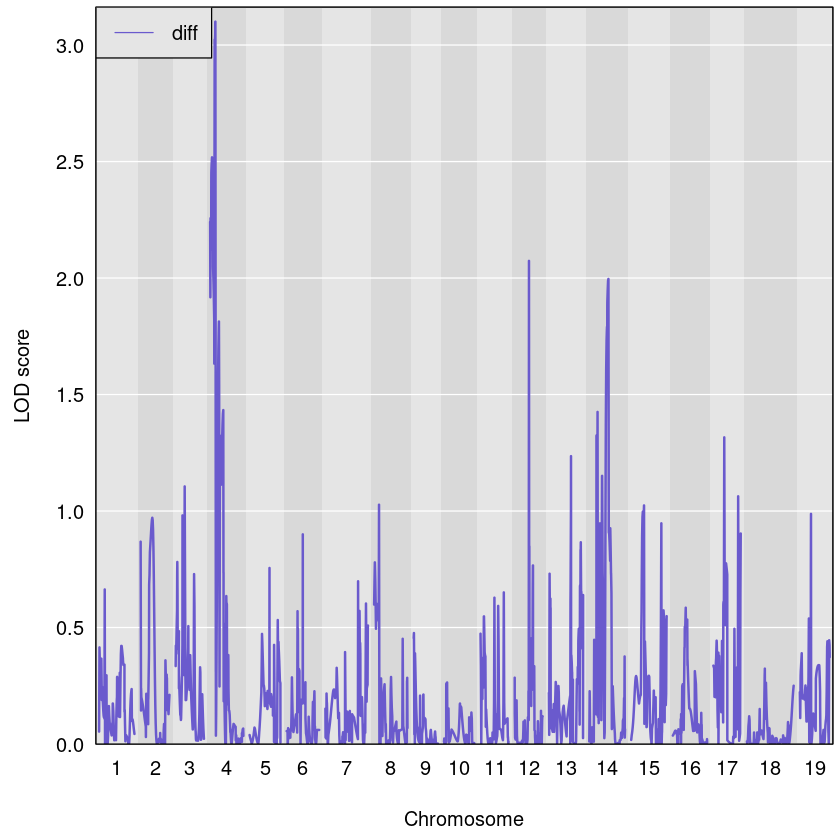

In [23]:
operm <- scan1perm(pr, male$pheno, n_perm=1000, cores=0)
out <- scan1(pr, male$pheno, cores=0)
write.csv(out,"LOD_male.csv")
ymx <- maxlod(out)
summary(operm)
lod <- summary(operm)
par(mar = c(4,4,0.3,0.3))
plot(out, map, lodcolumn=1, col="slateblue", ylim=c(0,ymx*1.02))
abline(h= lod, col = "red")
legend("topleft", lwd=1, col="slateblue", colnames(out),bg="gray90")

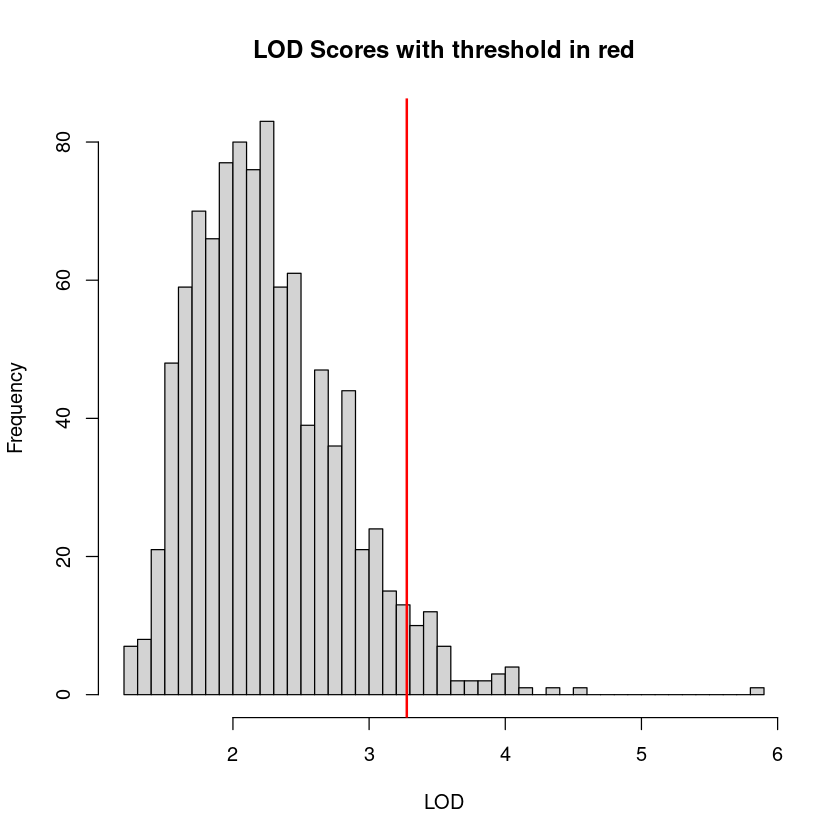

In [25]:
hist(operm[,'diff'],breaks = 50,xlab= "LOD",main= "LOD Scores with threshold in red")
abline(v=lod,col='red',lwd=2)

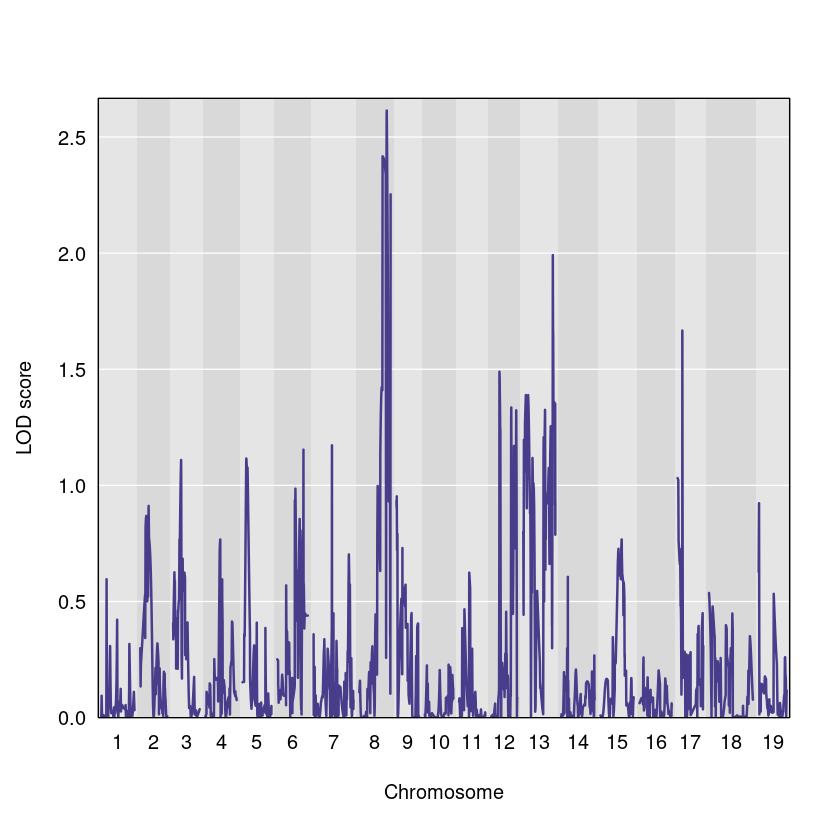

In [27]:
shuffled_order <- sample(rownames(male$pheno))
pheno_permuted <- male$pheno
rownames(pheno_permuted) <- shuffled_order
out_permuted <- scan1(pr,pheno_permuted,cores=0)
plot(out_permuted,map)

In [28]:
find_peaks(out,map,threshold=lod,drop=1.5,expand2markers=TRUE)
find_peaks(out,map,threshold=lod,prob=.95,expand2markers=TRUE)

lodindex,lodcolumn,chr,pos,lod,ci_lo,ci_hi
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>


lodindex,lodcolumn,chr,pos,lod,ci_lo,ci_hi
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
